# Second Delivery
### We will try different classifiyers for the previous data set
- KNeighborsClassifier
- DecisionTreeClassifier
- GaussianNB
- SVC
- MLPClassifier

###### Which classifier would you use to estimate the location?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("../datasets/UJIIndoorLoc/UJIIndoorLoc_B0-ID-01.csv")
data.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,102
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,107


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5249 entries, 0 to 5248
Columns: 521 entries, WAP001 to ID
dtypes: int64(521)
memory usage: 20.9 MB


###### First we need to split the data into train and test arrays for each axis
Be aware that the preprocessing has been done previously in FirstDelivery.
- X variable will contain the data
- Y variable will contain the ID's labels

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y
#or
# X = data.drop('ID', axis=1)
# y = data['ID']

0        122
1        102
2        110
3        111
4        107
        ... 
5244    3228
5245    3236
5246    3235
5247    3230
5248    3229
Name: ID, Length: 5249, dtype: int64

In train_test_split we set a random_state to 0 in order to demonstrate and guarantee the same outputs (what should be removed in production) and we stratify the Y so we will have the same proportion of splitted as the original percentage.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

In [6]:
accuracies = []
fit_times = []
pred_times = []

____________

### K-Nearest Neighbors Algorithm

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

Knowing the how the algorithm performs, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
Check: https://en.wikipedia.org/wiki/Feature_scaling

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
1737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1472,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ],
       [-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ],
       [-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ],
       ...,
       [-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ],
       [-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ],
       [-0.06009694, -0.06184581,  0.        , ...,  0.        ,
        -0.0252083 ,  0.        ]])

In [11]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

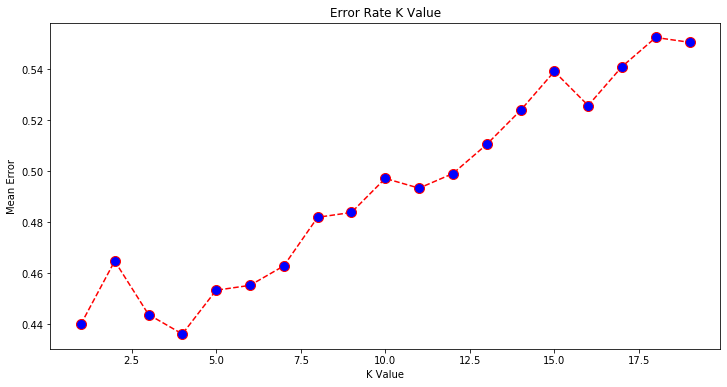

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

As we can see the best K value to minimize the mean error is, in this case 4.

In [13]:
t1 = time.time()
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [14]:
t2 = time.time()
knn_fit_time = round(t2 - t1, 3)
fit_times.append(knn_fit_time)
print("Train time:", knn_fit_time)

Train time: 0.149


In [15]:
t3 = time.time()
y_pred = knn.predict(X_test_scaled)
t4 = time.time()
knn_pred_time = round(t4 - t3, 3)
pred_times.append(knn_pred_time)
print("Prediction Time:", knn_pred_time)

Prediction Time: 1.342


In [16]:
knn_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(knn_accuracy)
print(knn_accuracy, "%")

56.381 %


In [17]:
# print(classification_report(y_test, y_pred))

___
___

### Naive Bayes Algorithm

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [19]:
t1 = time.time()
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)
t2 = time.time()
gnb_fit_time = round(t2 - t1, 3)
fit_times.append(gnb_fit_time)
print("Train time:", gnb_fit_time)
t3 = time.time()
y_pred = Gnb.predict(X_test)
t4 = time.time()
gnb_pred_time = round(t4 - t2, 3)
pred_times.append(gnb_pred_time)
print("Prediction Time:", gnb_pred_time)
gnb_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(gnb_accuracy)
print(gnb_accuracy, "%")

Train time: 0.045
Prediction Time: 0.179
44.0 %


In [20]:
# print(classification_report(y_test, y_pred))

In [21]:
t1 = time.time()
Bnb = BernoulliNB()
Bnb.fit(X_train, y_train)
t2 = time.time()
bnb_fit_time = round(t2 - t1, 3)
fit_times.append(bnb_fit_time)
print("Train time:", bnb_fit_time)
t3 = time.time()
y_pred = Bnb.predict(X_test)
t4 = time.time()
bnb_pred_time = round(t4 - t3, 3)
pred_times.append(bnb_pred_time)
print("Prediction Time:", bnb_pred_time)
bnb_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(bnb_accuracy)
print(bnb_accuracy, "%")

Train time: 1.487
Prediction Time: 0.008
42.0952 %


In [22]:
# print(classification_report(y_test, y_pred))

In [23]:
t1 = time.time()
Mnb = MultinomialNB()
Mnb.fit(X_train, y_train)
t2 = time.time()
mnb_fit_time = round(t2 - t1, 3)
fit_times.append(mnb_fit_time)
print("Train time:", mnb_fit_time)
t3 = time.time()
y_pred = Mnb.predict(X_test)
t4 = time.time()
mnb_pred_time = round(t4 - t3, 3)
pred_times.append(mnb_pred_time)
print("Prediction Time:", mnb_pred_time)
mnb_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(mnb_accuracy)
print(mnb_accuracy, "%")

Train time: 1.038
Prediction Time: 0.003
44.1905 %


In [24]:
# print(classification_report(y_test, y_pred))

##### Explanation
- __Gaussian__:
    Performs well when we assump that the values are sampled from a Gaussian distribution.
- __Bernoulli__:
    Takes into account boolean variables so the parameters that we want to predict take up only yes or no values
- __Multinomial__:
    Used to classify more than 2 different categories.
    
Here, unexpectedly from me, Gaussian is performing better than multinomial. This was unexpected by me since the fed data is discrete and we want to locate where the ID is knowing the influence of AP's.
Of course, taking into account that we have binary discrete values, Bernoulli, is the best performer.

___
___

### Decision Tree Algorithm

Note: The ideal way of tuning this algorithm is to calculate the are under the ROC curve in orther to modify the min_sample_split and the max_depth so it can perform its best.
ROC Curve explanation: https://www.youtube.com/watch?v=4jRBRDbJemM
Explanation for criterions:
https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

In [26]:
t1 = time.time()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=3)
dt.fit(X_train, y_train)
t2 = time.time()
dt_fit_time = round(t2 - t1, 3)
fit_times.append(dt_fit_time)
print("Train time:", dt_fit_time)
t3 = time.time()
y_pred = dt.predict(X_test)
t4 = time.time()
dt_pred_time = round(t4 - t3, 3)
pred_times.append(dt_pred_time)
print("Prediction Time:", dt_pred_time)
dt_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(dt_accuracy)
print(dt_accuracy, "%")

Train time: 0.081
Prediction Time: 0.002
52.9524 %


In [27]:
y_pred_probs = dt.predict_proba(X_test)
# y_pred_probs = y_pred_probs[:, 0]

In [28]:
cv_scores = cross_val_score(dt, X, y, cv=5) * 100

ROC graph summarizes all of the confusion matrices so without having to sort through all the confusion matrices, shows us wich threshold should be the best.

AUC makes easy to compare between ROC's

In [29]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# ValueError: multiclass format is not supported

y_pred_prob = dt.predict_proba(X_test)
roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

0.7846282188855542

In [30]:
# print(classification_report(y_test, y_pred))

___
___

### Multilayer Perceptron Algorithm

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
t1 = time.time()
mlp = MLPClassifier(activation="logistic", learning_rate_init=0.001, max_iter=100000)

In [33]:
mlp.fit(X_train, y_train)
t2 = time.time()
mlp_fit_time = round(t2 - t1, 3)
fit_times.append(mlp_fit_time)
print("Train time:", mlp_fit_time)

Train time: 89.852


In [34]:
t3 = time.time()
y_pred = mlp.predict(X_test)
t4 = time.time()
mlp_pred_time = round(t4 - t3, 3)
pred_times.append(mlp_pred_time)
print("Prediction Time:", mlp_pred_time)
mlp_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
accuracies.append(mlp_accuracy)
print(mlp_accuracy, "%")

Prediction Time: 0.005
61.9048 %


In [35]:
# print(classification_report(y_test, y_pred))

___
___
___

### Conclusions

In [36]:
models = ["K-Nearest Neighbors", "Naive Bayes-Gaussian", "Naive Bayes-Bernoulli", "Naive Bayes-Multinomial", "Decision Tree", "Multilayer Perceptron"]
x = np.arange(len(models))

#### Accuracies

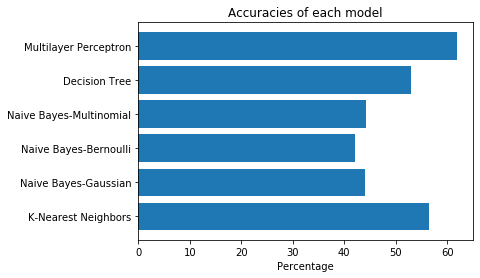

In [37]:
plt.barh(x, accuracies, align="center")
plt.yticks(x, models)
plt.xlabel("Percentage")
plt.ylabel = ("Model")
plt.title("Accuracies of each model")
plt.show()

#### Fit and Prediction Times

In [38]:
fit_times_NOmlp = fit_times[:-1]
pred_times_NOmlp = pred_times[:-1]
models_NOmlp = models[:-1]
x_NOmlp = np.arange(len(models)-1)

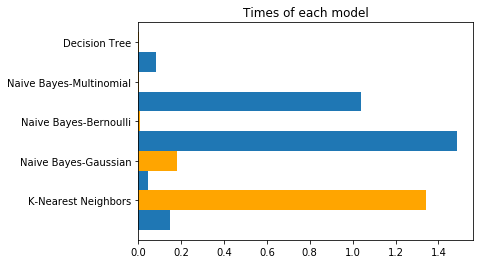

In [39]:
width = 0.5
fig, ax = plt.subplots()

fit_times_bar = ax.barh(x_NOmlp, fit_times_NOmlp, width)
pred_times_bar = ax.barh(x_NOmlp + width, pred_times_NOmlp, width, color="orange")

plt.ylabel = ("Model")
plt.xlabel = ("Time (ms)")
plt.title("Times of each model")
plt.yticks(x_NOmlp + width, models_NOmlp)

plt.show()

In [40]:
print("The multilayer perceptron is the one who performs best in prediction but the worst by far in fitting as we can see: \n -> Fitting time {}ms\n -> Prediction Time {}ms".format(mlp_fit_time, mlp_pred_time))

The multilayer perceptron is the one who performs best in prediction but the worst by far in fitting as we can see: 
 -> Fitting time 89.852ms
 -> Prediction Time 0.005ms


**Although the waste of time on fitting the model in case of the Multilayer perceptron, we would rather to use this model due to its accuracy and low prediction time.**